<a href="https://colab.research.google.com/github/pulkit48/NLP/blob/main/03_Spacy%20blank%20pipeline/spacy_blank_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blank nlp pipeline

In [1]:
import spacy

In [2]:
nlp=spacy.blank("en")
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
  print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


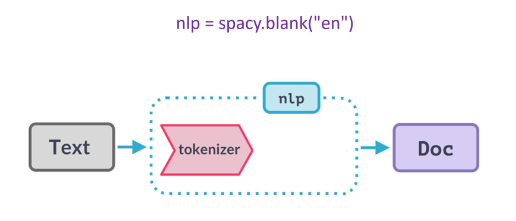

In [4]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [3]:
nlp=spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

sm in en_core_web_sm means small. There are other models available as well such as medium, large etc. Check this: https://spacy.io/usage/models#quickstart

In [5]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x78a8bbbd98a0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x78a8bbbd9960>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x78a8bbef2960>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x78a8bc18aa00>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x78a8bbbf3dc0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x78a8bbef26c0>)]

In [ ]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token, " | ",spacy.explain(token.pos_), " | ",token.lemma_)

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  numeral  |  $
of  |  adposition  |  of
samosa  |  proper noun  |  samosa
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


# Named entity recognization

In [9]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:
  print(ent.text,ent.label_)

Tesla Inc ORG
$45 billion MONEY


In [10]:
from spacy import displacy
displacy.render(doc,style='ent',jupyter=True)

# **Trained processing pipleine in French**

In [13]:
!python -m spacy download fr_core_news_sm

2024-02-02 11:20:15.803457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 11:20:15.803534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 11:20:15.805340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 11:20:17.196459: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 34.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [14]:
nlp=spacy.load("fr_core_news_sm")

In [15]:
doc = nlp("Tesla Inc va racheter Twitter pour $45 milliards de dollars")
for ent in doc.ents:
  print(ent.text," | ",ent.label_," | ",token.lemma_)


Tesla Inc  |  ORG  |  
Twitter  |  MISC  |  


In [16]:
for token in doc:
  print(token," | ",token.pos_," | ",token.lemma_)

Tesla  |  PROPN  |  Tesla
Inc  |  PROPN  |  Inc
va  |  VERB  |  aller
racheter  |  VERB  |  racheter
Twitter  |  VERB  |  twitter
pour  |  ADP  |  pour
$  |  NOUN  |  dollar
45  |  NUM  |  45
milliards  |  NOUN  |  milliard
de  |  ADP  |  de
dollars  |  NOUN  |  dollar


# **Adding a component to a blank pipeline**

In [17]:
source_nlp=spacy.load("en_core_web_sm")
nlp=spacy.blank("en")
nlp.add_pipe("ner",source=source_nlp)
nlp.pipe_names

['ner']

In [18]:
dpc=nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
  print(ent.text,ent.label_)

Tesla Inc ORG
Twitter MISC


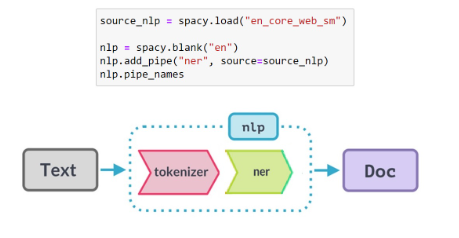